# Titanic Survival Classification

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

## Importing Data

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(df.shape)
print("")
df.info()

(418, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


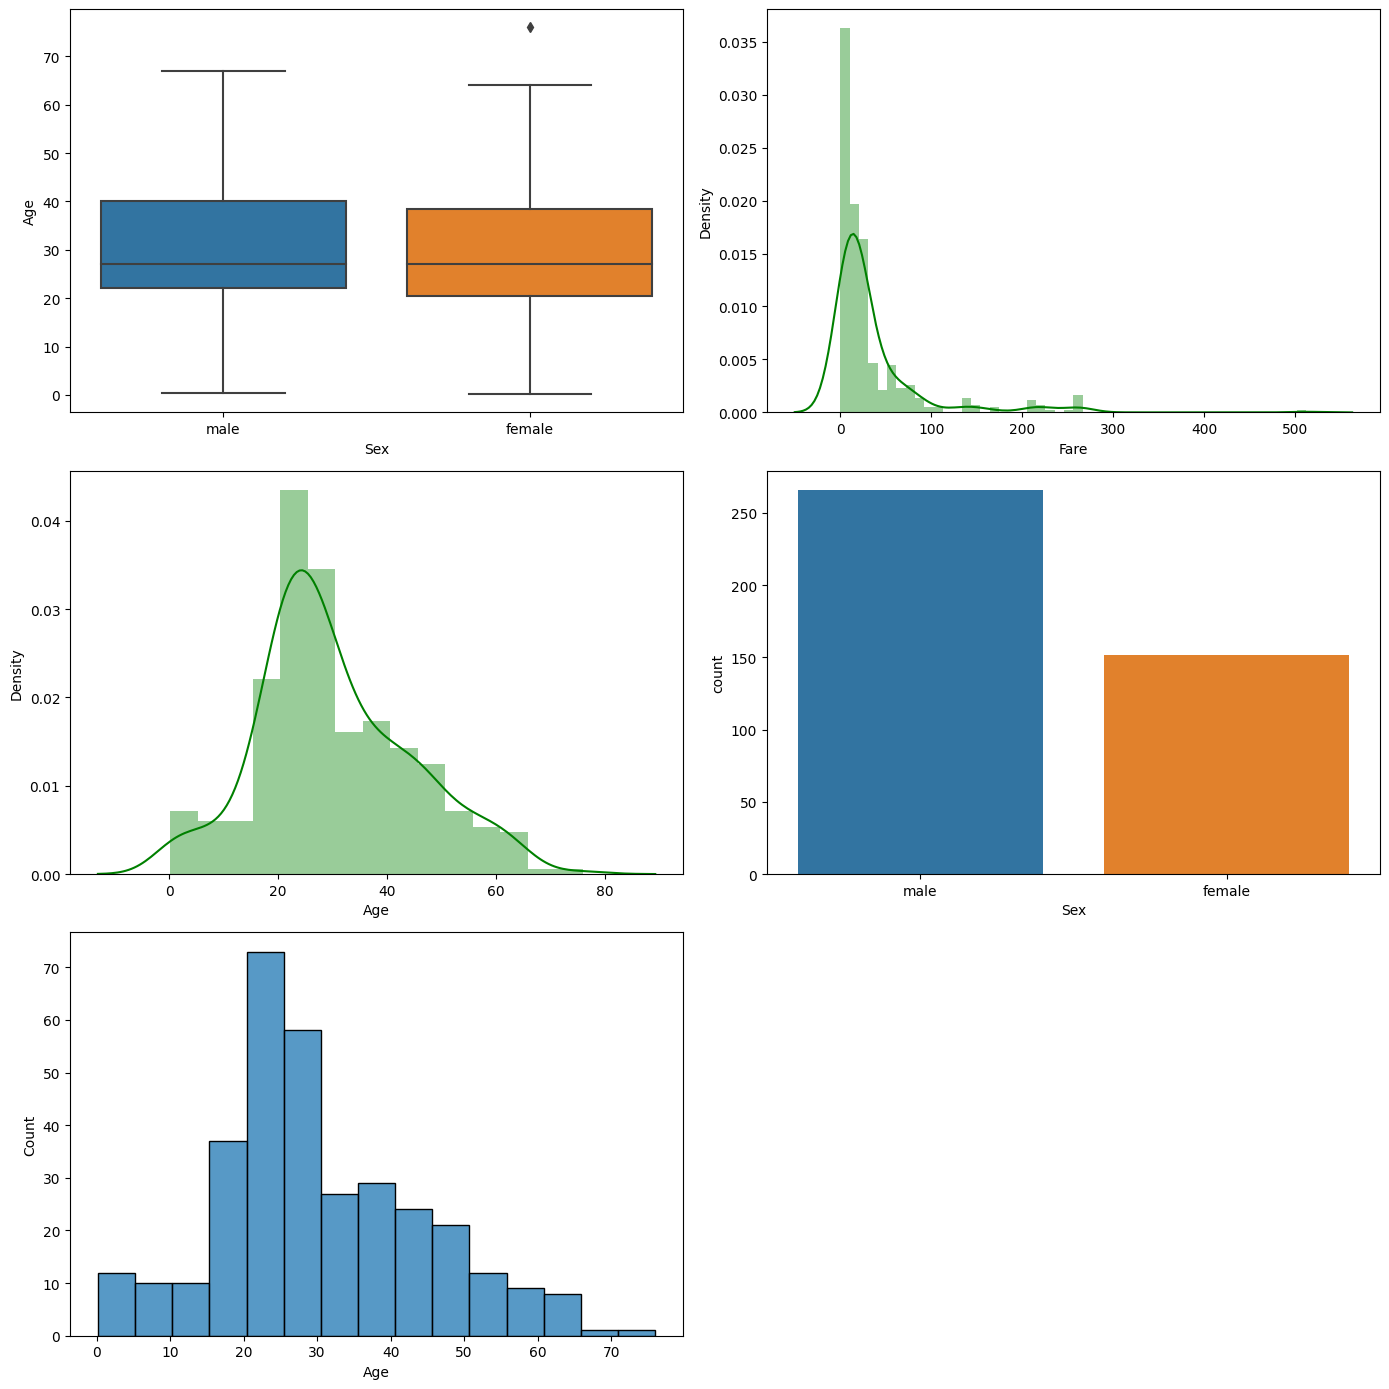

In [5]:
# data visualisation before cleaning data 

plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)
# 'male': 1, 'female': 0

plt.subplot(3,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(3,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(3,2,4)
sns.countplot(x='Sex', data=df)

plt.subplot(3,2,5)
sns.histplot(df['Age'])


plt.tight_layout()
plt.show()

## Data Cleaning

In [6]:
df.drop(columns=['PassengerId','Name','Embarked','Cabin'],inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,34.5,0,0,330911,7.8292
1,1,3,female,47.0,1,0,363272,7.0000
2,0,2,male,62.0,0,0,240276,9.6875
3,0,3,male,27.0,0,0,315154,8.6625
4,1,3,female,22.0,1,1,3101298,12.2875


In [8]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

df['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [9]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [11]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [12]:
import re
df['Ticket'] = df['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB


In [14]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.636364,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


## Data Visualisation

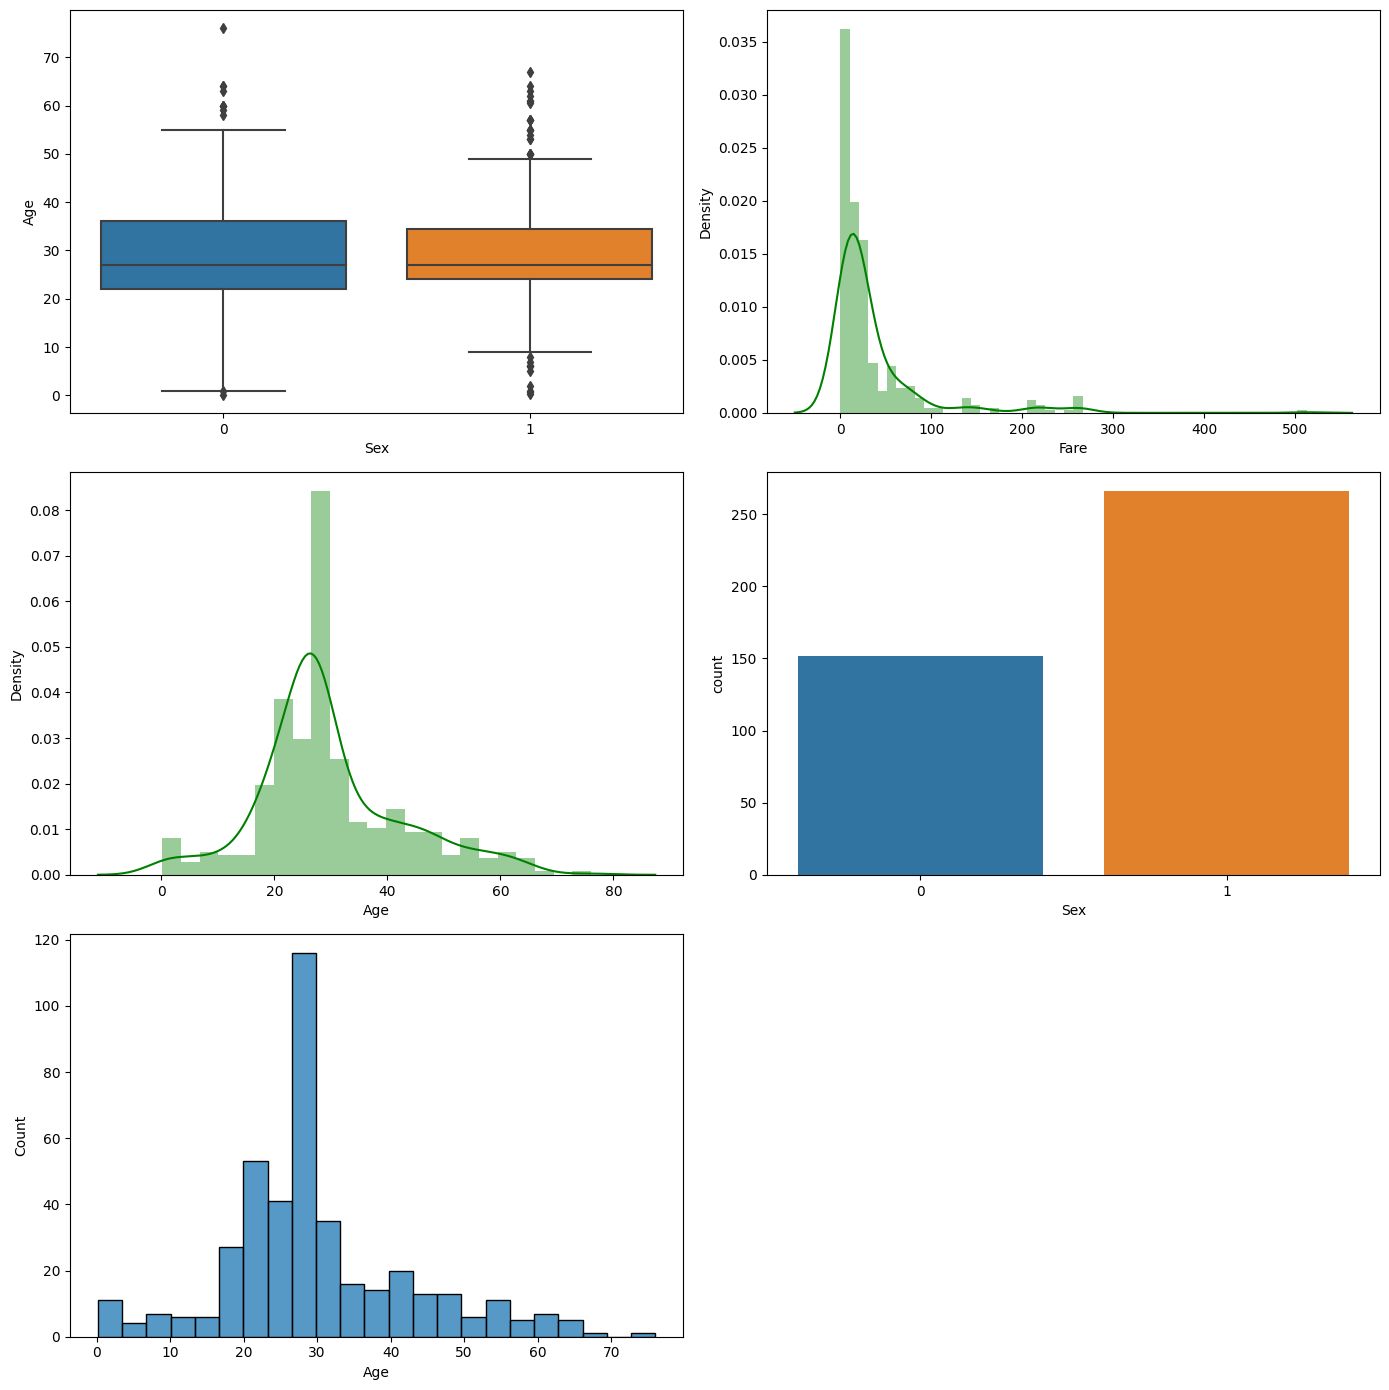

In [15]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)
# 'male': 1, 'female': 0

plt.subplot(3,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(3,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(3,2,4)
sns.countplot(x='Sex', data=df)

plt.subplot(3,2,5)
sns.histplot(df['Age'])


plt.tight_layout()
plt.show()

##### Note: 'male': 1, 'female': 0

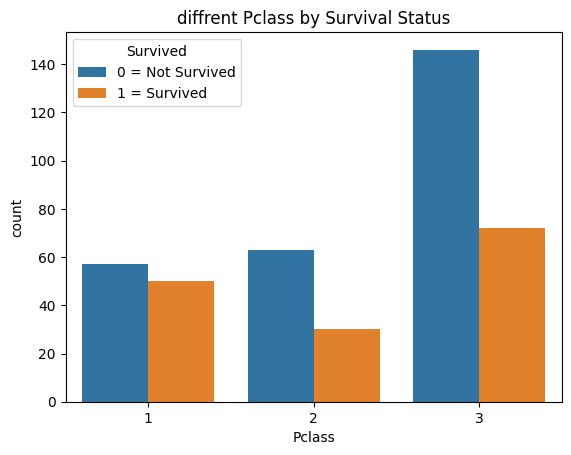

In [16]:
sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

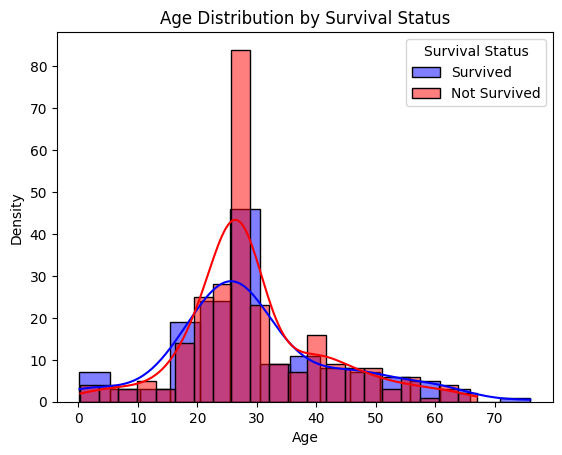

In [17]:
sns.histplot(data=df[df['Survived'] == 1], x='Age', kde=True, color='blue', label='Survived')
sns.histplot(data=df[df['Survived'] == 0], x='Age', kde=True, color='red', label='Not Survived')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')

plt.legend(title='Survival Status')

plt.show()

<AxesSubplot: >

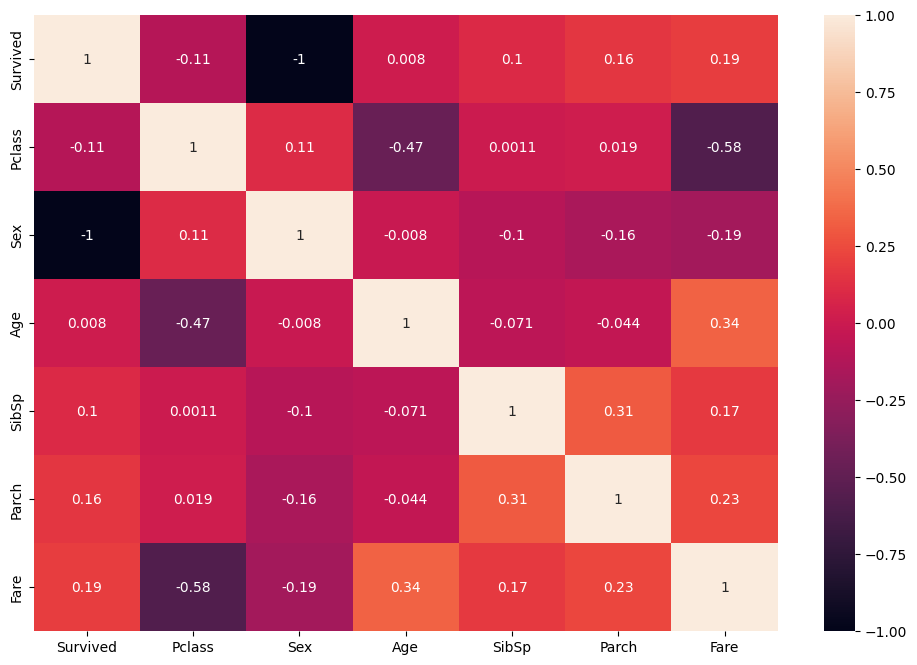

In [18]:
plt.figure(figsize=[12,8])
sns.heatmap(df.corr(),annot=True)

## ML Modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [20]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

In [22]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Support Vector Machine': SVC(),
          'Gradient Boosting': GradientBoostingClassifier(),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'Neural Network': MLPClassifier(max_iter=1000)  
          }

In [23]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)  # Compute classification report
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Logistic Regression - Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        53
           1       0.00      0.00      0.00        31

    accuracy                           0.63        84
   macro avg       0.32      0.50      0.39        84
weighted avg       0.40      0.63      0.49        84


Decision Tree - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy

##### Only 3 models (Decision Tree, Random Forest, Gradient Boosting) out of 6 models proviedes 100% accuracy (i.e 1.0)

## ML Modeling

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd
dt = DecisionTreeClassifier()
normal = MinMaxScaler()

In [25]:
normal_fit = normal.fit(X_train)
new_xtrain = normal_fit.transform(X_train)
new_xtest = normal_fit.transform(X_test)

In [26]:
fit_dt = dt.fit(new_xtrain, Y_train)
# Predicting score
dt_score = dt.score(new_xtest, Y_test)
print('Score of model is:', dt_score * 100, '%')

Score of model is: 100.0 %


In [27]:
X_predict = list(dt.predict(X_test))
# Create a DataFrame to compare predicted and original values
predicted_df = {'predicted_values': X_predict, 'original_values': Y_test}
print(pd.DataFrame(predicted_df).head(10))
print('')
print('Here O = not survived and 1 = survived')

     predicted_values  original_values
345                 1                1
378                 0                0
178                 1                1
367                 1                1
191                 0                0
60                  0                0
201                 0                0
183                 0                0
364                 1                1
200                 1                1

Here O = not survived and 1 = survived


##### Decision Tree Classifier predicts all the survivers correctly.